# K-NN on Different models-(BagOfWords,TfIDF,AvgWord2Vec,TfIDF Weighted Word2Vec)

In [1]:
%matplotlib inline

#import all the modules
import sqlite3
import numpy as np
import pandas as pd
import nltk
import seaborn as sns

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn import metrics
from sklearn.manifold import TSNE
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.cross_validation import cross_val_score
from collections import Counter
from sklearn import cross_validation
from sklearn.preprocessing import StandardScaler

D:\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


**Preprocessing**

In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Tejas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
stop = set(stopwords.words('english')) #set of stopwords
sno = nltk.stem.SnowballStemmer('english') #initialising the snowball stemmer

def cleanhtml(sentence): #function to clean the word of any html-tags
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext
def cleanpunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned
print(stop)

{'him', 'be', "haven't", 'against', "wouldn't", "hadn't", 'shan', 'some', 'aren', "it's", 'but', 'up', 'having', 'its', 'did', 'yourselves', "needn't", 'on', 'them', "won't", 'to', 'by', 'you', 'because', "should've", "shan't", 'there', 'off', 'so', 'we', 'and', 'has', 'below', 'her', 'are', 'does', 'other', 'm', "mightn't", 'while', 'both', 'these', 'was', 'once', 'they', "didn't", "you're", 'each', 'hasn', 'above', 'am', 'will', 'again', 'wasn', 'most', 'as', "that'll", 'needn', 'were', 'd', "isn't", "wasn't", 'don', 'few', 'mustn', 'she', "you've", 'such', 'can', 'been', 'hadn', 'an', 'in', 'further', 'during', 'weren', 'his', 'being', 'if', "weren't", 'that', "hasn't", 'ain', 'themselves', 'ma', 'yours', 't', 'should', 'too', 'about', 'of', 'their', 'the', 'all', "you'd", 's', 'when', 'doing', 'at', 'why', 'those', 'do', 'a', 'where', 'now', "couldn't", "don't", 've', 'mightn', 'me', 'doesn', 'shouldn', 'here', 'had', 'who', 'out', "doesn't", 'myself', 'y', 'won', 'itself', 'have',

In [2]:
conn=sqlite3.connect('D:/Applied AI Course/final2.sqlite')
conn.cursor()
conn.commit()
conn.text_factory=str
#final_data.to_sql('Reviews',conn,schema=None,if_exists='replace')

In [3]:
fd=pd.read_sql_query("""SELECT * FROM REVIEWS""",conn)

In [4]:
fd.head(5)

,index,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Time,Summary,Text,CleanedText
0,138706,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,939340800,EVERY book is educational,this witty little book makes my son laugh at l...,witti littl book make son laugh loud recit car...
1,138688,150506,0006641040,A2IW4PEEKO2R0U,Tracy,1,1,1194739200,"Love the book, miss the hard cover version","I grew up reading these Sendak books, and watc...",grew read sendak book watch realli rosi movi i...
2,138689,150507,0006641040,A1S4A3IQ2MU7V4,"sally sue ""sally sue""",1,1,1191456000,chicken soup with rice months,This is a fun way for children to learn their ...,fun way children learn month year learn poem t...
3,138690,150508,0006641040,AZGXZ2UUK6X,"Catherine Hallberg ""(Kate)""",1,1,1076025600,a good swingy rhythm for reading aloud,This is a great little book to read aloud- it ...,great littl book read nice rhythm well good re...
4,138691,150509,0006641040,A3CMRKGE0P909G,Teresa,3,4,1018396800,A great way to learn the months,This is a book of poetry about the months of t...,book poetri month year goe month cute littl po...


In [5]:
conn2=sqlite3.connect('D:/Applied AI Course/final.sqlite')

In [6]:
label_df=pd.read_sql_query("""SELECT * FROM REVIEWS""",conn2)

In [7]:
label_df.head(4)

,index,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText
0,138706,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,Positive,939340800,EVERY book is educational,this witty little book makes my son laugh at l...,witti littl book make son laugh loud recit car...
1,138688,150506,0006641040,A2IW4PEEKO2R0U,Tracy,1,1,Positive,1194739200,"Love the book, miss the hard cover version","I grew up reading these Sendak books, and watc...",grew read sendak book watch realli rosi movi i...
2,138689,150507,0006641040,A1S4A3IQ2MU7V4,"sally sue ""sally sue""",1,1,Positive,1191456000,chicken soup with rice months,This is a fun way for children to learn their ...,fun way children learn month year learn poem t...
3,138690,150508,0006641040,AZGXZ2UUK6X,"Catherine Hallberg ""(Kate)""",1,1,Positive,1076025600,a good swingy rhythm for reading aloud,This is a great little book to read aloud- it ...,great littl book read nice rhythm well good re...


In [8]:
label_df=label_df.sort_values('Time',axis=0,inplace=False,kind='quicksort')

In [9]:
label_df.shape

(364173, 12)

In [10]:
fd=fd.sort_values('Time',axis=0,inplace=False,kind='quicksort')

In [11]:
fd.head(3)

,index,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Time,Summary,Text,CleanedText
0,138706,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,939340800,EVERY book is educational,this witty little book makes my son laugh at l...,witti littl book make son laugh loud recit car...
30,138683,150501,0006641040,AJ46FKXOVC7NR,Nicholas A Mesiano,2,2,940809600,This whole series is great way to spend time w...,I can remember seeing the show when it aired o...,rememb see show air televis year ago child sis...
424,417839,451856,B00004CXX9,AIUWLEQ1ADEG5,Elizabeth Medina,0,0,944092800,Entertainingl Funny!,Beetlejuice is a well written movie ..... ever...,beetlejuic well written movi everyth excel act...


# Since we have not much of RAM we are working on select set of samples

In [12]:
d_pos=label_df[label_df["Score"] == 'Positive'].sample(n=20000)
d_neg=label_df[label_df["Score"] == 'Negative'].sample(n=20000)
finald=pd.concat([d_pos,d_neg])
finald.shape

(40000, 12)

In [13]:
finald.head(2)
final_d=finald.sort_values(by='Time')
final_d.head(3)

,index,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText
837,138001,149770,B00004S1C5,A1KXONFPU2XQ5K,Stephanie Manley,8,8,Positive,965779200,Very easy to use,This are so much easier to use than the Wilson...,much easier use wilson past color color vibran...
249,346115,374421,B00004CI84,A1FJOY14X3MUHE,Justin Howard,2,2,Positive,966297600,"A fresh, original film from master storyteller...","This is such a great film, I don't even know h...",great film dont even know sum first complet or...
864,138014,149785,B00004S1C6,A1KZ8KEBD4FONY,W. Zientek-Sico,60,61,Positive,1035504000,Wonderful product gives professional results,The spectra paste food colors are simply fanta...,spectra past food color simpli fantast provid ...


# Bag Of Words KNN

In [14]:
X=final_d["CleanedText"]
X.shape

(40000,)

In [15]:
y=final_d["Score"]
y.shape

(40000,)

#Train and Test Split for the preprocessed text

In [18]:
#split the data into train and test fo bag of words

X_train,X_test,Y_train,Y_test=cross_validation.train_test_split(X,y,test_size=0.3,random_state=None)
#split train into cross val train and cross val test
X_t,X_cv,Y_t,Y_cv=cross_validation.train_test_split(X_train,Y_train,test_size=0.3)

In [139]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(28000,) (12000,) (28000,) (12000,)


**Bag of Words**

In [19]:
#Bag of Words
BoW=CountVectorizer()
X_train=BoW.fit_transform(X_train)
#X_train=StandardScaler(with_mean=False).fit_transform(X_train)
x_test=BoW.transform(X_test)
#X_test=StandardScaler(with_mean=False).fit_transform(x_test)
print("the type of count vectorizer is:",type(X_train))
from sklearn import preprocessing
X_train=preprocessing.normalize(X_train)
X_test=preprocessing.normalize(x_test)
#X_test=StandardScaler(with_mean=False).fit_transform(x_test)

the type of count vectorizer is: <class 'scipy.sparse.csr.csr_matrix'>


In [20]:
print("Train Data Size: ",X_train.shape)
print("Test Data Size: ",X_test.shape)

Train Data Size:  (28000, 26896)
Test Data Size:  (12000, 26896)


# Optimal K

In [21]:
#with either k=8 or 9 we get best accuracy for test to be 91%,now with 10 fold cross validation we have to see if our ccuracy improves
n_list=list(range(0,15))
neighb=list(filter(lambda x: x % 2 != 0, n_list))
#create a list of cross-val scores
scores_cv=[]
for k in neighb:
    knn=KNeighborsClassifier(n_neighbors=k,algorithm="brute")
    scores=cross_val_score(knn,X_train,Y_train,cv=3,scoring='accuracy')
    scores_cv.append(scores.mean())

#Find misclassification error(i.e)how much data is misclassified

MSE=[1-x for x in scores_cv]

#find optimal k

optimal_k=neighb[MSE.index(min(MSE))]
print('\n the optimal k is %d.' % optimal_k)







 the optimal k is 13.


In [23]:
print("the type of count vectorizer is:",type(x_test))

the type of count vectorizer is: <class 'scipy.sparse.csr.csr_matrix'>


In [49]:
#KNN with optimal k and test accuracy for bag of words
from sklearn.neighbors import KNeighborsClassifier
knn_opt=KNeighborsClassifier(n_neighbors=optimal_k,algorithm="brute")
#fit the model
knn_opt.fit(X_train,Y_train)
#predict the model
prediction=knn_opt.predict(x_test)

#the accuracy score
acc_score=accuracy_score(Y_test,prediction)* 100
print('\n the accuracy score for bag of words model with optimal k=%d is %f%%' %(optimal_k,acc_score))


 the accuracy score for bag of words model with optimal k=13 is 70.933333%


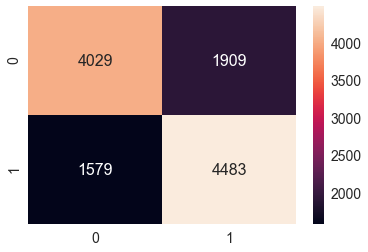

In [50]:
conf_matr_df = pd.DataFrame(confusion_matrix(Y_test, prediction), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df, annot=True,annot_kws={"size": 16}, fmt='g')

In [51]:
from sklearn.metrics import classification_report,precision_score,recall_score

print(classification_report(Y_test,prediction))

             precision    recall  f1-score   support

   Negative       0.72      0.68      0.70      5938
   Positive       0.70      0.74      0.72      6062

avg / total       0.71      0.71      0.71     12000



Observations:
Precision for BoW:71%
recall for BoW:71%

# KD-Tree

# GridSearch

In [58]:
X_train.shape

(28000, 26427)

In [21]:
from sklearn.preprocessing import StandardScaler
standardised_X_train=StandardScaler(with_mean=False).fit_transform(X_train)
standardised_X_test=StandardScaler(with_mean=False).fit(X_train).transform(x_test)

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [24]:
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix

sparse_train=csr_matrix(standardised_X_train)
sparse_test=csr_matrix(standardised_X_test)

svd=TruncatedSVD(n_components=9,n_iter=2)
svd_tr=svd.fit_transform(X_train)
svd_test =svd.fit(sparse_train).transform(sparse_test)
    
#X_train=svd.fit_transform(X_train)
#X_test=svd.transform(x_test)


In [25]:
print(svd.explained_variance_ratio_)
#print(svd.singular_values_)

[0.00276824 0.00177493 0.00156171 0.00081883 0.00054121 0.0008569
 0.00081883 0.00072098 0.00070051]


In [26]:
param_grid = {'n_neighbors':np.arange(1,20,2)}#create a list of cross-val scores
knn=KNeighborsClassifier(algorithm='kd_tree')
gsv = GridSearchCV(knn,param_grid,cv=3,verbose=1)
gsv.fit(svd_tr,Y_train)
print("Best HyperParameter: ",gsv.best_params_)
print("Best Accuracy: %.2f%%"%(gsv.best_score_*100))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best HyperParameter:  {'n_neighbors': 17}
Best Accuracy: 66.90%


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  1.4min finished


In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn_opt=KNeighborsClassifier(n_neighbors=17,algorithm='kd_tree')
#fit the model
knn_opt.fit(svd_tr,Y_train)
#predict the model
prediction=knn_opt.predict(svd_test)

#the accuracy score
acc_score=accuracy_score(Y_test,prediction)* 100
print('\n the accuracy score for bag of words model with optimal k=17 is %f%%'%acc_score)


 the accuracy score for bag of words model with optimal k=17 is 50.325000%


In [146]:
training_accuracy = knn_opt.score(svd_tr, Y_train)
training_error = 1 - training_accuracy
test_accuracy = accuracy_score(Y_test, prediction)
test_error = 1 - test_accuracy

print("training error:%.2f%%" %training_error)
print('#'*100)
print("training accuracy:%.2f%%" %training_accuracy)
print('#'*100)
print("test error:%.2f%%" %test_error)
print('#'*100)
print("test accuracy:%.2f%%" %test_accuracy)

training error:0.34%
####################################################################################################
training accuracy:0.66%
####################################################################################################
test error:0.50%
####################################################################################################
test accuracy:0.50%


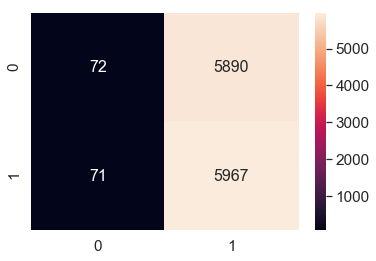

In [28]:
conf_matr_df = pd.DataFrame(confusion_matrix(Y_test, prediction), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df, annot=True,annot_kws={"size": 16}, fmt='g')

In [29]:
from sklearn.metrics import classification_report,precision_score,recall_score

print(classification_report(Y_test,prediction))

             precision    recall  f1-score   support

   Negative       0.50      0.01      0.02      5962
   Positive       0.50      0.99      0.67      6038

avg / total       0.50      0.50      0.35     12000



# TF-IDF KNN

In [149]:
X_train,X_test,Y_train,Y_test=cross_validation.train_test_split(X,y,test_size=0.3,random_state=0)
#split train into cross val train and cross val test
X_t,X_cv,Y_t,Y_cv=cross_validation.train_test_split(X_train,Y_train,test_size=0.3)

In [150]:
tf_idf_vect=TfidfVectorizer()
final_tfidf_vect=tf_idf_vect.fit_transform(X_train)
final_test_tfidf_vect=tf_idf_vect.transform(X_test)
from sklearn import preprocessing
X_train=preprocessing.normalize(final_tfidf_vect)
X_test=preprocessing.normalize(final_test_tfidf_vect)
final_tfidf_vect.get_shape(),final_test_tfidf_vect.get_shape()
print(X_train.shape,X_test.shape)

(28000,) (12000,)


In [151]:
X_train=final_tfidf_vect
X_test=final_test_tfidf_vect

In [35]:
Y_test.shape

(15000,)

**Optimal K**

In [61]:
#for finding optimal k with odd list for neighbors
n_list=list(range(0,20))
neighb=list(filter(lambda x: x % 2 != 0, n_list))
#create a list of cross-val scores
scores_cv=[]
for k in neighb:
    knn=KNeighborsClassifier(n_neighbors=k,algorithm="brute")
    scores=cross_val_score(knn,X_train,Y_train,cv=3,scoring='accuracy')
    scores_cv.append(scores.mean())

#Find misclassification error(i.e)how much data is misclassified

MSE=[1-x for x in scores_cv]

#find optimal k

optimal_k=neighb[MSE.index(min(MSE))]
print('\n the optimal k is %d.' % optimal_k)


 the optimal k is 19.


In [62]:
#KNN with optimal k and test accuracy for tf_idf model

knn_opt=KNeighborsClassifier(n_neighbors=optimal_k,algorithm="brute")
#fit the model
knn_opt.fit(X_train,Y_train)
#predict the model
prediction=knn_opt.predict(X_test)

#the accuracy score
acc_score=accuracy_score(Y_test,prediction)* 100
print('\n the accuracy score for bag of words model with optimal k=%d is %f%%' %(optimal_k,acc_score))


 the accuracy score for bag of words model with optimal k=19 is 73.233333%


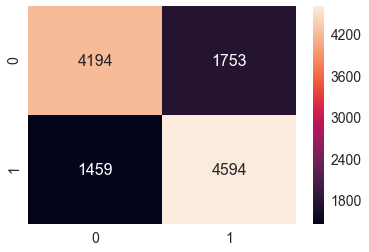

In [63]:
conf_matr_df = pd.DataFrame(confusion_matrix(Y_test, prediction), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df, annot=True,annot_kws={"size": 16}, fmt='g')

In [64]:
from sklearn.metrics import classification_report,precision_score,recall_score

print(classification_report(Y_test,prediction))

             precision    recall  f1-score   support

   Negative       0.74      0.71      0.72      5947
   Positive       0.72      0.76      0.74      6053

avg / total       0.73      0.73      0.73     12000



Observations

Recall(TPR) from the confusion matrix is: 73%
Precision=73%

# KDTree

In [152]:
from sklearn.preprocessing import StandardScaler
standardised_X_train=StandardScaler(with_mean=False).fit_transform(X_train)
standardised_X_test=StandardScaler(with_mean=False).fit(X_train).transform(X_test)

In [157]:
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
from sklearn import preprocessing

sparse_train=csr_matrix(standardised_X_train)
sparse_test=csr_matrix(standardised_X_test)

X_train=preprocessing.normalize(sparse_train)
X_test=preprocessing.normalize(sparse_test)
#svd=TruncatedSVD(n_components=10,n_iter=2)
#svd_tr=svd.fit_transform(X_train)
#svd_test =svd.fit(sparse_train).transform(sparse_test)

In [154]:
param_grid = {'n_neighbors':np.arange(1,20,2)}#create a list of cross-val scores
knn=KNeighborsClassifier(algorithm='kd_tree')
gsv = GridSearchCV(knn,param_grid,cv=3,verbose=1)
gsv.fit(X_train,Y_train)
print("Best HyperParameter: ",gsv.best_params_)
print("Best Accuracy: %.2f%%"%(gsv.best_score_*100))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best HyperParameter:  {'n_neighbors': 19}
Best Accuracy: 73.60%


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  2.2min finished


In [155]:
#KNN with optimal k and test accuracy for tf_idf model

knn_opt=KNeighborsClassifier(n_neighbors=19,algorithm="kd_tree")
#fit the model
knn_opt.fit(svd_tr,Y_train)
#predict the model
prediction=knn_opt.predict(svd_test)

#the accuracy score
acc_score=accuracy_score(Y_test,prediction)* 100
print('\n the accuracy score for bag of words model with optimal k=19 is %f%%' %acc_score)

training_accuracy = knn_opt.score(svd_tr, Y_train)
training_error = 1 - training_accuracy
test_accuracy = accuracy_score(Y_test, prediction)
test_error = 1 - test_accuracy

print("training error:%.2f%%" %training_error)
print('#'*100)
print("training accuracy:%.2f%%" %training_accuracy)
print('#'*100)
print("test error:%.2f%%" %test_error)
print('#'*100)
print("test accuracy:%.2f%%" %test_accuracy)


 the accuracy score for bag of words model with optimal k=19 is 49.591667%
training error:0.23%
####################################################################################################
training accuracy:0.77%
####################################################################################################
test error:0.50%
####################################################################################################
test accuracy:0.50%


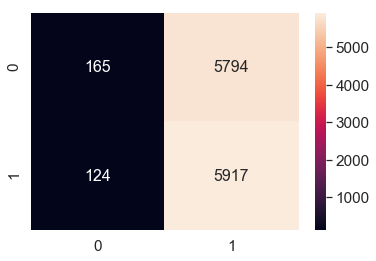

In [121]:
conf_matr_df = pd.DataFrame(confusion_matrix(Y_test, prediction), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df, annot=True,annot_kws={"size": 16}, fmt='g')

In [116]:
from sklearn.metrics import classification_report,precision_score,recall_score

print(classification_report(Y_test,prediction))

             precision    recall  f1-score   support

   Negative       0.50      0.98      0.66      5959
   Positive       0.45      0.02      0.03      6041

avg / total       0.47      0.49      0.34     12000



# AvgWord2Vec KNN

In [ ]:
!pip install gensim

In [16]:
import gensim
from gensim.models import word2vec,KeyedVectors

D:\Anaconda\lib\site-packages\gensim\utils.py:1209: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [101]:
#model=word2vec.Word2Vec.load('drive/My Drive/w2vmodel')
#model

In [17]:
X=final_d["Text"]
X.shape

(40000,)

In [18]:
y=final_d["Score"]
y.shape


(40000,)

In [19]:
X_train,X_test,Y_train,Y_test=cross_validation.train_test_split(X,y,test_size=0.3,random_state=0)
#split train into cross val train and cross val test
X_t,X_cv,Y_t,Y_cv=cross_validation.train_test_split(X_train,Y_train,test_size=0.3)

In [20]:
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(28000,) (28000,) (12000,) (12000,)


In [0]:
import re

def cleanhtml(sentence): #function to clean the word of any html-tags
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext
def cleanpunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned

In [21]:
#word2vec own model
i=0
list_of_sentence=[]
for sent in X_train.values:
    filtered_sentence=[]
    list_of_sentence.append(sent.split())
    #sent=cleanhtml(sent)
    #for w in sent.split():
      #   for cleaned in cleanpunc(w).split():
      #      if(cleaned.isalpha()):
       #         filtered_sentence.append(cleaned.lower())
        #    else:
         #       continue
#list_of_sentence.append(filtered_sentence)
#print(X["CleanedText"].values[0])
#print('###########')
#print(list_of_sentence[0])
w2v_model=gensim.models.Word2Vec(list_of_sentence,min_count=5,size=50,workers=4)

words=list(w2v_model.wv.vocab)
print(len(words))

19527


In [55]:
i=0
list_of_sentences=[]
for sent in X_test.values:
    filtered_sentence=[]
    list_of_sentences.append(sent.split())
    #sent=cleanhtml(sent)
    #for w in sent.split():
      #   for cleaned in cleanpunc(w).split():
      #      if(cleaned.isalpha()):
       #         filtered_sentence.append(cleaned.lower())
        #    else:
         #       continue
#list_of_sentence.append(filtered_sentence)
#print(X["CleanedText"].values[0])
#print('###########')
#print(list_of_sentence[0])
w2v_model_test=gensim.models.Word2Vec(list_of_sentences,min_count=5,size=50,workers=4)

words_test=list(w2v_model.wv.vocab)
print(len(words))

19578


In [26]:
words=list(w2v_model.wv.vocab)
print(len(words))

19578


In [22]:
w2v_model.wv.most_similar('like')

D:\Anaconda\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('like,', 0.6837463974952698),
 ('like.', 0.612736701965332),
 ('enjoy', 0.588869571685791),
 ('prefer', 0.5741478800773621),
 ('love', 0.536929190158844),
 ('liked', 0.5263469219207764),
 ('miss', 0.5241415500640869),
 ('think', 0.5200361013412476),
 ('good,', 0.5177718997001648),
 ('ok,', 0.5103519558906555)]

In [28]:
#word2vec for test
i=0
list_of_sentences=[]
for sent in X_test:
    filtered_sentences=[]
    list_of_sentences.append(sent.split())
    #sent=cleanhtml(sent)
    #for w in sent.split():
     #   for cleaned in cleanpunc(w).split():
      #      if(cleaned.isalpha()):
       #         filtered_sentence.append(cleaned.lower())
        #    else:
         #       continue
#list_of_sentences.append(filtered_sentence)
#print(X_train.values[0])
#print('###########')
print(list_of_sentences[0])
w2v_model_test=gensim.models.Word2Vec(list_of_sentences,min_count=5,size=50,workers=4)

words_test=list(w2v_model_test.wv.vocab)
print(len(words_test))


['Do', 'a', 'google', 'search.', 'You', 'can', 'find', 'quality', 'invertase', 'for', 'a', 'dollar', 'an', 'ounce', 'elsewhere.', 'Rather', 'than', '$5', '(or', 'more)', 'an', 'ounce', 'on', 'Amazon.']
11194


In [29]:
w2v_model_test.wv.most_similar('like')

D:\Anaconda\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('like.', 0.6904017925262451),
 ('prefer', 0.6648592352867126),
 ('enjoy', 0.6442909836769104),
 ('love', 0.6440689563751221),
 ('like,', 0.6234484314918518),
 ('notice', 0.6203017830848694),
 ('disliked', 0.6146832704544067),
 ('bitter', 0.6039746999740601),
 ('mean', 0.6028439998626709),
 ('care', 0.5950648188591003)]

In [25]:
from tqdm import tqdm

In [30]:
sent_vectors = [] 
for sent in tqdm(list_of_sentence): # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    cnt_words =0 # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        try:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
        except:
            pass
        
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
print(len(sent_vectors))
print(len(sent_vectors[0]))

X_train_vectorised=sent_vectors

sent_vectors_test = [] 
for sent in tqdm(list_of_sentences): # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    cnt_words =0 # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        try:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
        except:
            pass
        
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors_test.append(sent_vec)
print(len(sent_vectors_test))
print(len(sent_vectors_test[0]))

X_test_vectorised=sent_vectors_test

100%|██████████████████████████████████| 28000/28000 [00:09<00:00, 2963.78it/s]


28000
50


100%|██████████████████████████████████| 12000/12000 [00:04<00:00, 2947.34it/s]


12000
50


In [31]:
print(len(X_train_vectorised))
print(len(X_test_vectorised))

X_train=np.nan_to_num(X_train_vectorised)
X_test=np.nan_to_num(X_test_vectorised)

#x_test=np.array(X_test)
#X_train=np.array(X_train)

print(X_test.shape)

28000
12000
(12000, 50)


In [60]:
#for finding optimal k with odd list for neighbors
n_list=list(range(0,20))
neighb=list(filter(lambda x: x % 2 != 0, n_list))
#create a list of cross-val scores
scores_cv=[]
for k in neighb:
    knn=KNeighborsClassifier(n_neighbors=k,algorithm="brute")
    scores=cross_val_score(knn,X_train,Y_train,cv=3,scoring='accuracy')
    scores_cv.append(scores.mean())


#Find misclassification error(i.e)how much data is misclassified

MSE=[1-x for x in scores_cv]

#find optimal k

optimal_k=neighb[MSE.index(min(MSE))]
print('\n the optimal k is %d.' % optimal_k)


 the optimal k is 19.


In [61]:
#KNN with optimal k and test accuracy for AvgWord2Vec model

knn_opt=KNeighborsClassifier(n_neighbors=optimal_k,algorithm="brute")
#fit the model
knn_opt.fit(X_train,Y_train)
#predict the model
prediction=knn_opt.predict(X_test)

#the accuracy score
acc_score=accuracy_score(Y_test,prediction)* 100
print('\n the accuracy score for AvgWord2Vec model with optimal k=%d is %f%%' %(optimal_k,acc_score))


 the accuracy score for AvgWord2Vec model with optimal k=19 is 74.525000%


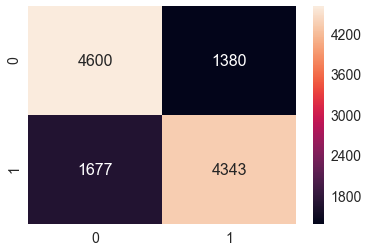

In [62]:
conf_matr_df = pd.DataFrame(confusion_matrix(Y_test, prediction), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df, annot=True,annot_kws={"size": 16}, fmt='g')

In [63]:
from sklearn.metrics import classification_report,precision_score,recall_score

print(classification_report(Y_test,prediction))

             precision    recall  f1-score   support

   Negative       0.73      0.77      0.75      5980
   Positive       0.76      0.72      0.74      6020

avg / total       0.75      0.75      0.75     12000



Observations
For Avg W2Vec:
precision:75%
recall:75%


# Kd-Tree

In [33]:
from sklearn.preprocessing import StandardScaler
standardised_X_train=StandardScaler(with_mean=False).fit_transform(X_train)
standardised_X_test=StandardScaler(with_mean=False).fit(X_train).transform(X_test)

In [34]:
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
from sklearn import preprocessing

sparse_train=csr_matrix(standardised_X_train)
sparse_test=csr_matrix(standardised_X_test)

svd=TruncatedSVD(n_components=10,n_iter=2)
X_train=svd.fit_transform(sparse_train)
X_test=svd.fit(sparse_train).transform(sparse_test)

In [35]:
print(svd.explained_variance_ratio_)

[0.05947476 0.11440301 0.07894447 0.07558227 0.06679042 0.06292326
 0.05620717 0.0492982  0.04180286 0.03545387]


In [37]:
param_grid = {'n_neighbors':np.arange(1,20,2)}#create a list of cross-val scores
knn=KNeighborsClassifier(algorithm='kd_tree')
gsv = GridSearchCV(knn,param_grid,cv=3,verbose=1)
gsv.fit(X_train,Y_train)
print("Best HyperParameter: ",gsv.best_params_)
print("Best Accuracy: %.2f%%"%(gsv.best_score_*100))

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  2.9min finished


Best HyperParameter:  {'n_neighbors': 19}
Best Accuracy: 71.09%


In [39]:
knn_opt=KNeighborsClassifier(n_neighbors=19,algorithm="kd_tree")
#fit the model
knn_opt.fit(X_train,Y_train)
#predict the model
prediction=knn_opt.predict(X_test)

#the accuracy score
acc_score=accuracy_score(Y_test,prediction)* 100
print('\n the accuracy score for bag of words model with optimal k=19 is %f%%' %acc_score)

training_accuracy = knn_opt.score(X_train, Y_train)
training_error = 1 - training_accuracy
test_accuracy = accuracy_score(Y_test, prediction)
test_error = 1 - test_accuracy

print("training error:%.2f%%" %training_error)
print('#'*100)
print("training accuracy:%.2f%%" %training_accuracy)
print('#'*100)
print("test error:%.2f%%" %test_error)
print('#'*100)
print("test accuracy:%.2f%%" %test_accuracy)


 the accuracy score for bag of words model with optimal k=19 is 72.016667%
training error:0.25%
####################################################################################################
training accuracy:0.75%
####################################################################################################
test error:0.28%
####################################################################################################
test accuracy:0.72%


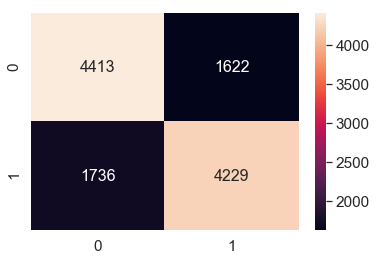

In [40]:
conf_matr_df = pd.DataFrame(confusion_matrix(Y_test, prediction), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df, annot=True,annot_kws={"size": 16}, fmt='g')

In [41]:
from sklearn.metrics import classification_report,precision_score,recall_score

print(classification_report(Y_test,prediction))

             precision    recall  f1-score   support

   Negative       0.72      0.73      0.72      6035
   Positive       0.72      0.71      0.72      5965

avg / total       0.72      0.72      0.72     12000



# Weighted Tf-Idf Word2Vec KNN

In [42]:
model = TfidfVectorizer()
tf_idf_matrix = model.fit_transform(final_d['CleanedText'].values)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(model.get_feature_names(), list(model.idf_)))

In [43]:
X=final_d["CleanedText"]
X.shape

(40000,)

In [44]:
y=final_d["Score"]
y.shape

(40000,)

In [45]:
#split the data into train and test fo tf-idf

X_train,X_test,Y_train,Y_test=cross_validation.train_test_split(X,y,test_size=0.3,random_state=0)
#split train into cross val train and cross val test
X_t,X_cv,Y_t,Y_cv=cross_validation.train_test_split(X_train,Y_train,test_size=0.3)

In [46]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(28000,) (12000,) (28000,) (12000,)


In [47]:
tf_idf_vect=TfidfVectorizer()
final_tf_idf_vect=model.fit_transform(X_train)
final_test_tfidf_vect=model.transform(X_test)
#X_train=StandardScaler(with_mean=False).fit_transform(final_tf_idf_vect)
#X_test=StandardScaler(with_mean=False).fit_transform(final_test_tfidf_vect)
final_tf_idf_vect.get_shape(),final_test_tfidf_vect.get_shape()
print(X_train.shape,X_test.shape)

(28000,) (12000,)


In [48]:
tfidf_feat = model.get_feature_names() # tfidf words/col-names
# final_tf_idf is the sparse matrix with row= sentence, col=word and cell_val = tfidf

tfidf_sent_vectors = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in tqdm(list_of_sentence): # for each review/sentence 
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        try:
            vec = w2v_model.wv[word]
#             tf_idf = tf_idf_matrix[row, tfidf_feat.index(word)]
            # to reduce the computation we are 
            # dictionary[word] = idf value of word in whole courpus
            # sent.count(word) = tf valeus of word in this review
            tf_idf = dictionary[word]*sent.count(word)
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
        except:
            pass
        
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_sent_vectors.append(sent_vec)
    row += 1

100%|██████████████████████████████████| 28000/28000 [00:11<00:00, 2508.47it/s]


In [49]:
tfidf_feat = model.get_feature_names() # tfidf words/col-names
# final_tf_idf is the sparse matrix with row= sentence, col=word and cell_val = tfidf

tfidf_sent_vectors_test = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in tqdm(list_of_sentences): # for each review/sentence 
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        try:
            vec = w2v_model.wv[word]
            tf_idf = dictionary[word]*sent.count(word)
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf    
        except:
            pass
            
#             tf_idf = tf_idf_matrix[row, tfidf_feat.index(word)]
            # to reduce the computation we are 
            # dictionary[word] = idf value of word in whole courpus
            # sent.count(word) = tf valeus of word in this review
            
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_sent_vectors_test.append(sent_vec)
    row += 1

100%|██████████████████████████████████| 12000/12000 [00:04<00:00, 2524.04it/s]


In [50]:
X_train=np.array(tfidf_sent_vectors)
X_test=np.array(tfidf_sent_vectors_test)

In [51]:
X_train.shape,X_test.shape

((28000, 50), (12000, 50))

In [88]:
#for finding optimal k with odd list for neighbors
n_list=list(range(0,20))
neighb=list(filter(lambda x: x % 2 != 0, n_list))
#create a list of cross-val scores
scores_cv=[]
for k in neighb:
    knn=KNeighborsClassifier(n_neighbors=k,algorithm="brute")
    scores=cross_val_score(knn,X_train,Y_train,cv=10,scoring='accuracy')
    scores_cv.append(scores.mean())

#Find misclassification error(i.e)how much data is misclassified

MSE=[1-x for x in scores_cv]

#find optimal k

optimal_k=neighb[MSE.index(min(MSE))]
print('\n the optimal k is %d.' % optimal_k)


 the optimal k is 19.


In [89]:
#KNN with optimal k and test accuracy for Weighted TfIDF Word2Vec model

knn_opt=KNeighborsClassifier(n_neighbors=optimal_k,algorithm="brute")
#fit the model
knn_opt.fit(X_train,Y_train)
#predict the model
prediction=knn_opt.predict(X_test)

#the accuracy score
acc_score=accuracy_score(Y_test,prediction)* 100
print('\n the accuracy score for TfIdf Word2Vec model with optimal k=%d is %f%%' %(optimal_k,acc_score))


 the accuracy score for TfIdf Word2Vec model with optimal k=19 is 62.408333%


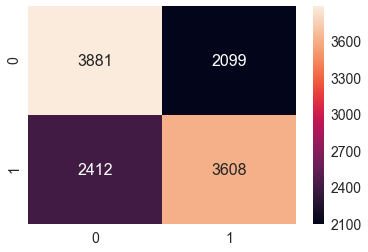

In [90]:
conf_matr_df = pd.DataFrame(confusion_matrix(Y_test, prediction), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df, annot=True,annot_kws={"size": 16}, fmt='g')

In [91]:
from sklearn.metrics import classification_report,precision_score,recall_score

print(classification_report(Y_test,prediction))

             precision    recall  f1-score   support

   Negative       0.62      0.65      0.63      5980
   Positive       0.63      0.60      0.62      6020

avg / total       0.62      0.62      0.62     12000



# Kd-Tree

In [52]:
from sklearn.preprocessing import StandardScaler
standardised_X_train=StandardScaler(with_mean=False).fit_transform(X_train)
standardised_X_test=StandardScaler(with_mean=False).fit(X_train).transform(X_test)

In [53]:
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
from sklearn import preprocessing

sparse_train=csr_matrix(standardised_X_train)
sparse_test=csr_matrix(standardised_X_test)

svd=TruncatedSVD(n_components=10,n_iter=2)
X_train=svd.fit_transform(sparse_train)
X_test=svd.fit(sparse_train).transform(sparse_test)

In [54]:
print(svd.explained_variance_ratio_)

[0.06622576 0.16398679 0.12432625 0.09202225 0.06562119 0.05636741
 0.04895079 0.0378915  0.03418174 0.03170195]


In [55]:
param_grid = {'n_neighbors':np.arange(1,20,2)}#create a list of cross-val scores
knn=KNeighborsClassifier(algorithm='kd_tree')
gsv = GridSearchCV(knn,param_grid,cv=3,verbose=1)
gsv.fit(X_train,Y_train)
print("Best HyperParameter: ",gsv.best_params_)
print("Best Accuracy: %.2f%%"%(gsv.best_score_*100))

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  2.0min finished


Best HyperParameter:  {'n_neighbors': 17}
Best Accuracy: 58.10%


In [56]:
knn_opt=KNeighborsClassifier(n_neighbors=17,algorithm="kd_tree")
#fit the model
knn_opt.fit(X_train,Y_train)
#predict the model
prediction=knn_opt.predict(X_test)

#the accuracy score
acc_score=accuracy_score(Y_test,prediction)* 100
print('\n the accuracy score for avg w2vec model with optimal k=17 is %f%%' %acc_score)

training_accuracy = knn_opt.score(X_train, Y_train)
training_error = 1 - training_accuracy
test_accuracy = accuracy_score(Y_test, prediction)
test_error = 1 - test_accuracy

print("training error:%.2f%%" %training_error)
print('#'*100)
print("training accuracy:%.2f%%" %training_accuracy)
print('#'*100)
print("test error:%.2f%%" %test_error)
print('#'*100)
print("test accuracy:%.2f%%" %test_accuracy)


 the accuracy score for avg w2vec model with optimal k=17 is 57.641667%
training error:0.35%
####################################################################################################
training accuracy:0.65%
####################################################################################################
test error:0.42%
####################################################################################################
test accuracy:0.58%


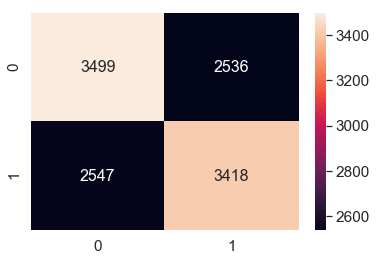

In [58]:
conf_matr_df = pd.DataFrame(confusion_matrix(Y_test, prediction), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df, annot=True,annot_kws={"size": 16}, fmt='g')

In [59]:
from sklearn.metrics import classification_report,precision_score,recall_score

print(classification_report(Y_test,prediction))

             precision    recall  f1-score   support

   Negative       0.58      0.58      0.58      6035
   Positive       0.57      0.57      0.57      5965

avg / total       0.58      0.58      0.58     12000



# Conclusion

From the above the highest precision and recall is 75% with algorithm set to brute force and optimal k being 17